In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

print(os.listdir("data"))
data=pd.read_csv('data/results.csv')

['results.csv']


### Explore the dataset

In [2]:
data.sample(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
24973,2002-09-02,Tanzania,Zanzibar,1,1,Friendly,Dar es Salaam,Tanzania,False
20593,1997-06-15,Solomon Islands,Tahiti,4,1,FIFA World Cup qualification,Sydney,Australia,True
1187,1929-04-20,Barbados,Trinidad and Tobago,3,0,Friendly,Bridgetown,Barbados,False
1027,1927-03-16,Portugal,France,4,0,Friendly,Lisbon,Portugal,False
31877,2010-01-06,United Arab Emirates,Malaysia,1,0,AFC Asian Cup qualification,Dubai,United Arab Emirates,False


In [3]:
data[['tournament']].describe()

,tournament
count,41640
unique,112
top,Friendly
freq,17029


In [4]:
data.groupby('tournament').agg('max')

,date,home_team,away_team,home_score,away_score,city,country,neutral
tournament,,,,,,,,
ABCS Tournament,2015-02-01,Suriname,Suriname,8,9,Willemstad,Suriname,True
AFC Asian Cup,2019-02-01,Yemen,Yemen DPR,8,7,Tripoli,Vietnam,True
AFC Asian Cup qualification,2018-03-27,Yemen,Yemen DPR,20,8,al-Wakrah,Yemen,True
AFC Challenge Cup,2016-11-15,Turkmenistan,Turkmenistan,11,6,New Delhi,Sri Lanka,True
AFC Challenge Cup qualification,2013-03-26,Turkmenistan,Turkmenistan,9,9,Vientiane,Sri Lanka,True
...,...,...,...,...,...,...,...,...
Viva World Cup,2012-06-09,Zanzibar,Zanzibar,21,18,Xewkija,Sweden,True
WAFF Championship,2014-01-07,Yemen,Yemen,7,4,al-Farwaniyah,Syria,True
West African Cup,1987-02-08,Togo,Togo,5,5,Ouagadougou,Liberia,True


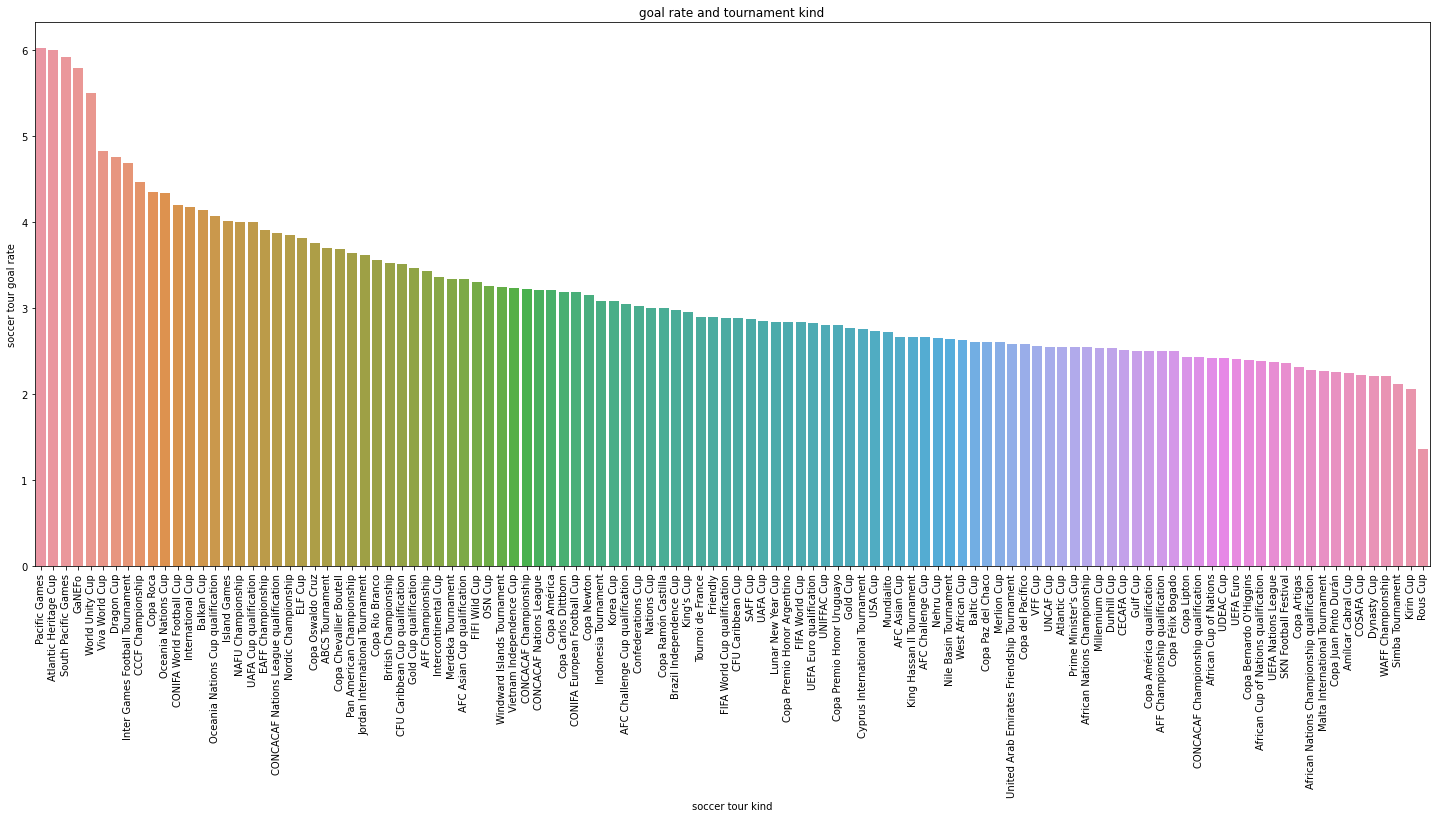

In [5]:
import seaborn as sns 
tour_kind = list(data.tournament.unique())

tour_goal_rate = []
for i in tour_kind:
    t = data[data["tournament"] == i]
    rate = (sum(t.home_score)+sum(t.away_score))/len(t)
    tour_goal_rate.append(rate)

dictionary = {"tour_goal_rate" : tour_goal_rate, "tour_kind" : tour_kind}
new_data = pd.DataFrame(dictionary)
new_index  = (new_data["tour_goal_rate"].sort_values(ascending = False)).index.values
sorted_data = new_data.reindex(new_index)

plt.figure(figsize = (25,10))
sns.barplot(x = sorted_data["tour_kind"],y = sorted_data["tour_goal_rate"])
plt.xticks(rotation = 90)
plt.xlabel("soccer tour kind")
plt.ylabel("soccer tour goal rate")
plt.title("goal rate and tournament kind")
plt.show()

### Add total_scores and Year Column

In [6]:
data['total_scores'] = data['home_score'] + data['away_score']
# covert str to date time format
data['date'] = pd.to_datetime(data['date'])
data['year'] = data.date.dt.year

In [7]:
data.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_scores,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,1876


In [8]:
friendlyMatch = data.loc[data['tournament'] == 'Friendly'].copy()

In [9]:
friendlyMatch.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_scores,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,0,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,6,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,3,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,4,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,3,1876


In [10]:
# use year as x, total_scores as y, draw graph to display the trend 
# and also train a model using linear regression, then predict giving the year
y = friendlyMatch.groupby(['year'])['total_scores'].sum()

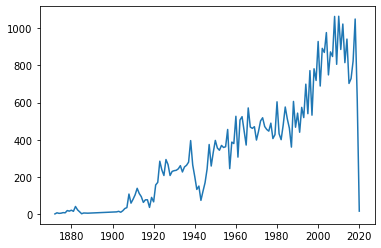

In [11]:
plt.plot(y)

In [12]:
tournaments = data.tournament.unique()
tour_data_map = {}

for tournament in tournaments:
    tour_data = data.loc[data['tournament'] == tournament].copy()
    y = tour_data.groupby(['year'])['total_scores'].sum()
    tour_data_map[tournament] = y

In [13]:
tour_data_map

{'Friendly': year
 1872       0
 1873       6
 1874       3
 1875       4
 1876       7
         ... 
 2016     729
 2017     824
 2018    1050
 2019     619
 2020      15
 Name: total_scores, Length: 134, dtype: int64,
 'British Championship': year
 1884    30
 1885    37
 1886    32
 1887    28
 1888    46
         ..
 1980    12
 1981     5
 1982    12
 1983    10
 1984     9
 Name: total_scores, Length: 89, dtype: int64,
 'Copa Lipton': year
 1905    0
 1906    2
 1908    4
 1909    3
 1910    4
 1911    2
 1912    2
 1913    4
 1915    3
 1916    3
 1917    1
 1918    2
 1919    3
 1922    1
 1923    0
 1924    2
 1927    1
 1928    4
 1929    0
 1937    6
 1942    2
 1945    4
 1957    2
 1962    4
 1968    2
 1973    2
 1976    5
 1992    0
 Name: total_scores, dtype: int64,
 'Copa Newton': year
 1906    3
 1908    3
 1909    4
 1911    5
 1912    6
 1913    1
 1915    2
 1916    4
 1917    1
 1918    2
 1919    3
 1920    4
 1922    4
 1924    4
 1927    1
 1928    1
 1929    3

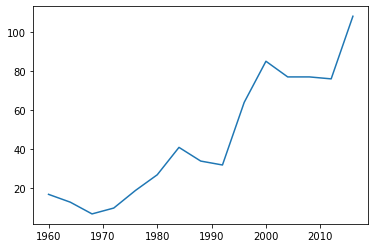

In [14]:
# Euro cup
plt.plot(tour_data_map['UEFA Euro'])

### Define the get_trend funtion

In [15]:
def get_trend(tournament):
    plt.title("Goals Trend of " + tournament)
    plt.plot(tour_data_map[tournament])
    plt.xlabel("Year")
    plt.ylabel("Goals")

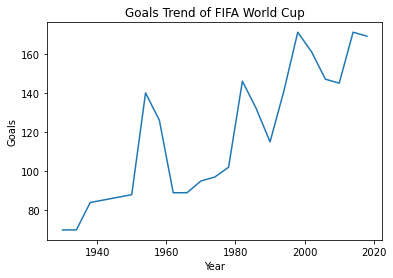

In [16]:
get_trend("FIFA World Cup")

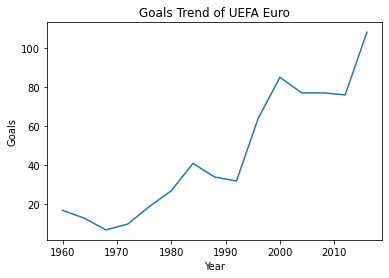

In [17]:
get_trend("UEFA Euro")

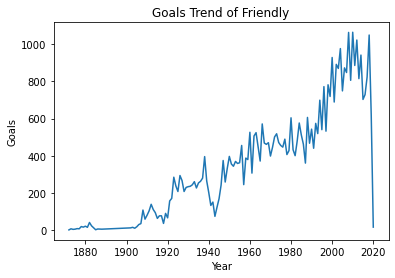

In [18]:
get_trend("Friendly")

### Train a Linear Regression Model

In [19]:
fri_data = tour_data_map['Friendly'].to_frame()

In [20]:
X = fri_data.values

In [21]:
y = fri_data.index.tolist()

In [22]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
# split data into training & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# use linear regression model
regr = linear_model.LinearRegression()
# train the data
regr.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = regr.predict(X_test)

In [24]:
fri_data.describe()

,total_scores
count,134.000000
mean,368.373134
std,287.759916
min,0.000000
25%,107.750000
50%,359.000000
75%,522.750000
max,1065.000000


### Evaluation of the model

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [0.13255769]
Mean squared error: 658.12
Coefficient of determination: 0.53


In [26]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 13.749618406336738
Mean Squared Error: 658.1151918882337
Root Mean Squared Error: 25.653755902172175


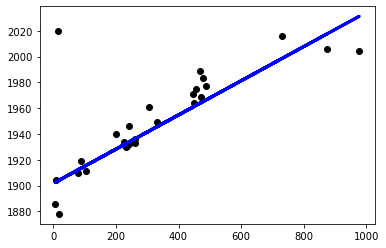

In [27]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

In [28]:
y_pred

array([1945.71582275, 1960.69484123, 1964.00878337, 1931.66470808,
       1936.17166939, 1962.02041808, 1902.36945956, 1932.59261188,
       2031.21552997, 1961.09251428, 1912.17872829, 1928.35076594,
       1933.91818873, 1902.8996903 , 1942.26932293, 1965.20180254,
       1998.34122394, 1913.50430515, 1904.09270947, 1932.85772725,
       2017.42953067, 1963.61111031, 1966.52737939, 1933.78563105,
       1936.43678476, 1903.69503641, 1915.36011275])

In [31]:
year = [[2022], [2026], [2030], [2034]]
y_pred = regr.predict(year)

In [32]:
y_pred

array([2169.73831144, 2170.26854219, 2170.79877293, 2171.32900367])